##This short notebook compares 3 different models on a small dataset.

1A baseline RandomForestClassifier (all default parameters)

2A RandomForestClassifier tuned with RandomizedSearchCV (and refit=True)

3A RandomForestClassifier tuned with GridSearchCV (and refit=True)

The most important part is they all use the same data splits created using train_test_split() and np.random.seed(42).

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [2]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/Divya-thomas/Python-Projects/master/heart-disease.csv")

# Split into X & y
X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

# Split into train & test
np.random.seed(42) # seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



#Make evaluation function

In [3]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

## Baseline Model
#Create model with default hyperparameters

In [4]:
np.random.seed(42)

# Make & fit baseline model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)

Acc: 83.61%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


## RandomizedSearchCV
 Find hyperparameters with RandomizedSearchCV.

In [8]:
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters grid
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42, # set random_state to 42 for reproducibility
                            refit=True) # set refit=True (default) to refit the best model on the full dataset 

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train) # 'rs' is short for RandomizedSearch


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_

[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   3.5s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   3.4s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   3.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   3.5s
[CV] n_estimators=1200, min_samples_split=2, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=2)

In [9]:
# Check best parameters of RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30}

In [10]:
# Evaluate RandomizedSearch model
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the classifier on validation set
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


## GridSearchCV
#Find best hyperparameters using GridSearchCV.

In [15]:
from sklearn.model_selection import GridSearchCV

# Setup the parameters grid
grid_2 = {"n_estimators": [100,200,300],
        "max_depth": [20,30,40],
        "max_features": ["auto"],
        "min_samples_split": [2,3,4],
        "min_samples_leaf": [2,4,6]}



In [16]:
# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)




In [19]:
# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2, 
                            cv=5,
                            verbose=2,
                            refit=True) # set refit=True (default) to refit the best model on the full dataset 

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train) # 'gs' is short for GridSearch

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=   0.9s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=   0.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=   0.9s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=   0.9s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=   0.9s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=300, total=   0.8s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=300 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=300, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=300 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=300, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=300 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=300, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=300 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=300, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   0.8s
[CV] max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   0.9s
[CV] max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   0.9s
[CV] max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   0.9s
[CV] max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=auto, min_samples_le

[CV]  max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300, total=   0.8s
[CV] max_depth=40, max_features=auto, min_samples_le

[CV]  max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=200 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=40, max_features=auto, min_samples_le

[CV]  max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   0.9s
[CV] max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=300 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   0.9s
[CV] max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=300 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   0.9s
[CV] max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=300 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   0.9s


[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  3.9min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [20, 30, 40], 'max_features': ['auto'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [20]:
# Find best parameters of GridSearchCV
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 200}

In [21]:
# Evaluate GridSearchCV model
gs_y_preds = gs_clf.predict(X_test)

In [22]:
# Evaluate the classifier on validation set
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


## Compare metrics
 Compare all of the found metrics between the models.

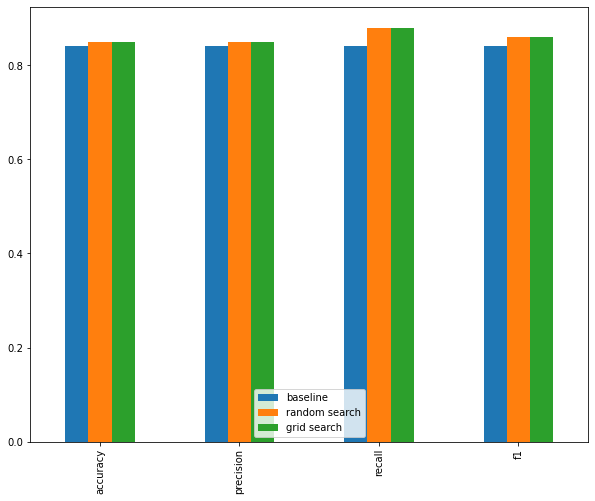

In [23]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));